# Learning Curves

In [1]:
import os
import numpy as np
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_log(data):
    log = {}
    for s in ['sgd_bandit', 'sgd_cv', 'saga_bandit']:
        d = defaultdict(list)
        for t in ['train', 'dev', 'norm', 'variance']:
            for filename in glob.glob(os.path.join('results', data, s+'_*_'+t+'.dat')):
                d[t].append(np.fromfile(filename))
        log[s] = d
    return log

In [54]:
#mnist = read_log('mnist_tmp')
mnist = read_log('mnist_tmp2')

In [64]:
label = {'train': 'Avg. cumulative Loss',
         'dev': 'Avg. cumulative Loss', 
         'norm': 'Squared Norm of Gradients', 
         'variance': 'Variance'}
color = {'saga full': '#559C3F', 
         'saga bandit': '#3678AF', 
         'sgd bandit': '#D2342B', 
         'sgd cv': '#F18533', 
         'sgd full': '#634395'}
legends = {'saga bandit': r'$\rho$-SAGA', 
           'sgd bandit': r'$\rho$-SGD', 
           'sgd cv': r'$\rho$-SGD + CV'}

def plot_curves(results, s, title, ylim=None, xlim=None):
    legend = []
    means = []
    stds = []
    for name in ['sgd_bandit', 'sgd_cv', 'saga_bandit']:
        m = results[name]
        n = ' '.join(name.split('_')[:2])
        legend.append(n)
        means.append(np.mean(m[s], axis=0))
        stds.append(np.std(m[s], axis=0))
    
    u = int(len(means[0])/10)
    for mean, std, l in zip(means, stds, legend):
        t = np.arange(len(mean))
        plt.plot(t, mean, label=legends[l], color=color[l])
        plt.fill_between(t, mean - std, mean + std, alpha=0.1, color=color[l])
        print(l, 'mean:', mean.min(), mean.argmin(), std.mean())
    
    v = [np.min(means), np.max(means)]
    if ylim:
        v = [ylim[0], ylim[-1]]
    #plt.plot([u/10, u/10], v, '--', color='0.3', lw=1, label='(1st epoch)')
    
    plt.legend()
    plt.xlabel('Number of Instances [in thousand]')
    plt.ylabel(label[s])
    plt.title(title + ' [' + s + ']')
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.show()

sgd bandit mean: 0.105653611111 5999 0.0217247069239
sgd cv mean: 0.0990867777778 5999 0.0017893788894
saga bandit mean: 0.0983773888889 5999 0.00515505898469


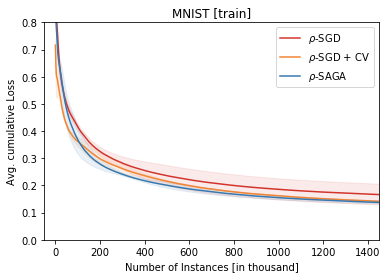

In [65]:
plot_curves(mnist, 'train', 'MNIST', ylim=(0, 0.8), xlim=(-50,1450))

sgd bandit mean: 0.0789666666667 5701 0.0105121821295
sgd cv mean: 0.0788333333333 5833 0.00270186379595
saga bandit mean: 0.0783 5644 0.00346582709286


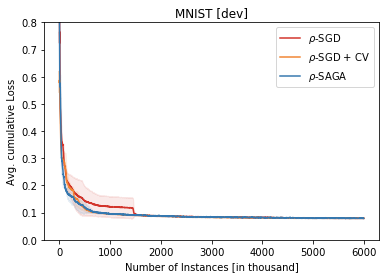

In [66]:
plot_curves(mnist, 'dev', 'MNIST', ylim=(0, 0.8))

sgd bandit mean: 0.0789666666667 5701 0.0105121821295
sgd cv mean: 0.0788333333333 5833 0.00270186379595
saga bandit mean: 0.0783 5644 0.00346582709286


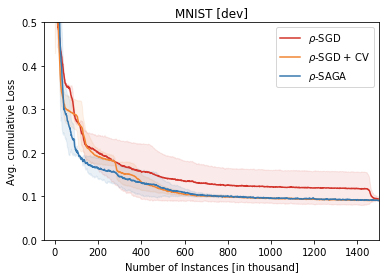

In [69]:
plot_curves(mnist, 'dev', 'MNIST', ylim=(0, 0.5), xlim=(-50,1500))

sgd bandit mean: 6.49527736912 5999 0.382651587711
sgd cv mean: 3.87708795316 5999 0.0512970405256
saga bandit mean: 11.3933347005 5999 0.198247998128


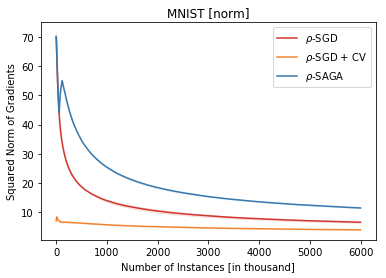

In [70]:
plot_curves(mnist, 'norm', 'MNIST')

sgd bandit mean: 6.49527736912 5999 0.382651587711
sgd cv mean: 3.87708795316 5999 0.0512970405256
saga bandit mean: 11.3933347005 5999 0.198247998128


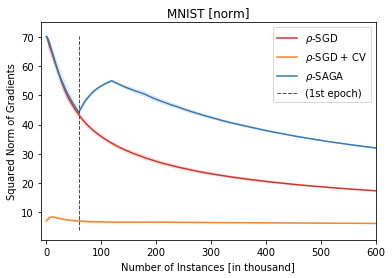

In [62]:
plot_curves(mnist, 'norm', 'MNIST', xlim=(-10, 600))

sgd bandit mean: 6.49511243861 5999 0.382654107218
sgd cv mean: 3.87703279362 5999 0.0512724683648
saga bandit mean: 11.3931637349 5999 0.198217696591


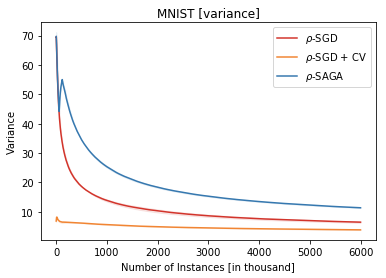

In [71]:
plot_curves(mnist, 'variance', 'MNIST')

sgd bandit mean: 6.49511243861 5999 0.382654107218
sgd cv mean: 3.87703279362 5999 0.0512724683648
saga bandit mean: 11.3931637349 5999 0.198217696591


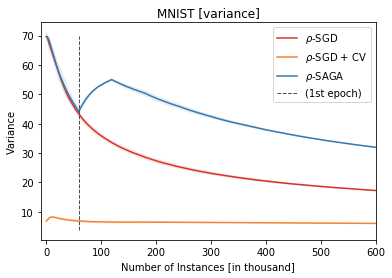

In [63]:
plot_curves(mnist, 'variance', 'MNIST', xlim=(-10, 600))